# IoT Sensor Data Analysis

In this project, I aimed to create a comprehensive data analysis portfolio piece using synthetic IoT (Internet of Things) sensor data. The goal was to showcase my skills in data manipulation, visualization, and analysis. To do this, I transitioned from using the wxPython framework in a previous version of this project to a Jupyter notebook environment, which is more suitable for data analysis tasks.

To start, I set up a Jupyter notebook environment and imported the required libraries. I chose Jupyter because of its versatility in handling data analysis tasks and its interactive nature, which allows for seamless integration of code and explanations. This environment provides an excellent platform for showcasing the entire data analysis process.


In [172]:
import faker
import random
import numpy as np
from datetime import datetime
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Data Generation

I used the Python Faker library to generate synthetic IoT sensor data. The Faker library allows for the creation of realistic-looking but entirely fictitious data, which is crucial for privacy and ethical considerations. I generated data for two main components: user records and sensor records.

In [173]:
# Initialize Faker library and set sampling time to 6 hours
fake = faker.Faker()
SAMPLING_TIME = 60*60*6

In [174]:
# Creates and returns faker time series generator
def get_series():
    series = fake.time_series(start_date='-5y+23d', end_date='now', precision=SAMPLING_TIME)
    return series

Next, I generated synthetic sensor data. Each user had associated sensor records including date, time, outside temperature, outside humidity, room temperature, and room humidity. I ensured that there were no duplicate sensor records and that each user had a sufficient number of associated sensor records for a robust analysis.

In [175]:
# Initializing set for sensor records
sensor_records = set()
sensor_records_no = 500

while len(sensor_records) < sensor_records_no:
    sensor_records.add(fake.date())
    sensor_records.add(fake.time())
    sensor_records.add(fake.random_int())
    sensor_records.add(fake.random_int())
    sensor_records.add(fake.random_int())
    sensor_records.add(fake.random_int())

I then created generators for date and time from the time series data.

In [176]:
def gen_date():
    series = get_series()
    for sample in series:
        sample_date = datetime.strptime(str(sample[0]), '%Y-%m-%d %H:%M:%S').date()
        yield str(sample_date)

def gen_time():
    series = get_series()
    for sample in series:
        sample_time = datetime.strptime(str(sample[0]), '%Y-%m-%d %H:%M:%S').time()
        yield str(sample_time)

Now, I used the generated sensor records to create synthetic sensor data.

In [177]:
def get_sensor_data(sensor_records):
    sensor_date = gen_date()
    sensor_time = gen_time()
    sensor_data = []
    for sensor in sensor_records:
        sensor = { 
                  'date': next(sensor_date),
                  'time': next(sensor_time),
                  'outside temperature': fake.random_int(min=70, max=95),
                  'outside humidity': fake.random_int(min=50, max=95),
                  'room temperature': fake.random_int(min=70, max=95) - fake.random_int(min=0, max=10),
                  'room humidity': fake.random_int(min=50, max=95) - fake.random_int(min=0, max=10),
                }
        sensor_data.append(sensor)
    return sensor_data

# Generating sensor data
sensor_data = get_sensor_data(sensor_records)

#####
# Generate date and time data
date_gen = list(gen_date())
time_gen = list(gen_time())

# # Create a list of sensor data dictionaries
# sensor_data = []

# Populate the list with sensor data dictionaries
for _ in range(sensor_records_no):
    sensor = { 
        'date': date_gen.pop(0),
        'time': time_gen.pop(0),
        'outside temperature': fake.random_int(min=70, max=95),
        'outside humidity': fake.random_int(min=50, max=95),
        'room temperature': fake.random_int(min=70, max=95) - fake.random_int(min=0, max=10),
        'room humidity': fake.random_int(min=50, max=95) - fake.random_int(min=0, max=10)
    }
    sensor_data.append(sensor)

# Create DataFrame from the list of sensor data dictionaries
sensor_df = pd.DataFrame(sensor_data)

# Combine 'date' and 'time' columns into a single datetime column
sensor_df['datetime'] = pd.to_datetime(sensor_df['date'] + ' ' + sensor_df['time'])

# Drop the individual 'date' and 'time' columns
sensor_df.drop(['date', 'time'], axis=1, inplace=True)

# Print the first few rows of the DataFrame
sensor_df.head()

,outside temperature,outside humidity,room temperature,room humidity,datetime
0,84,69,74,74,2018-10-26 17:09:14
1,74,52,92,79,2018-10-26 23:09:14
2,79,79,73,44,2018-10-27 05:09:14
3,93,51,70,49,2018-10-27 11:09:14
4,84,94,88,82,2018-10-27 17:09:14


We now generate user records with unique attributes.

In [178]:
# Initializing set for user records
user_records = set()
user_records_no = 500

while len(user_records) < user_records_no:
    user_records.add(fake.first_name())
    user_records.add(fake.last_name())
    user_records.add(fake.user_name())
    user_records.add(fake.address())
    user_records.add(fake.email())

Next, I focused on generating unique user records with attributes like first name, last name, age, gender, username, address, email, and associated sensor data. The gender distribution was based on a 50% male and 50% female split. This diverse set of user records was crucial for the subsequent analysis.

In [183]:
# Generates random First/Last names and associates with Gender
def get_random_name_and_gender():
    skew = .5 # 50% of users will be female
    male = random.random() > skew
    if male:
        return fake.first_name_male(), fake.last_name_male(), 'M'
    else:
        return fake.first_name_female(), fake.last_name_female(), 'F'

Using the generated user records, I create user profiles.

In [184]:
def get_users(user_records):
    first_name, last_name, gender = get_random_name_and_gender()
    users = []
    for user in user_records:
        user = {
                'first name': first_name,
                'last name': last_name,
                'age': fake.random_int(18, 100),
                'gender': gender,
                'username': fake.user_name(),
                'address': fake.address(),
                'email': fake.email(),
                'sensor data': get_sensor_data(sensor_records),
                }
        users.append(user)
    return users

# Generating user profiles
users = get_users(user_records)

### Data Analysis

After generating user and sensor records, I integrated them into a single DataFrame. This allowed for a comprehensive view of the data, with user attributes alongside the associated sensor records. I then converted the 'date' and 'time' columns into datetime format for easier manipulation and analysis.

In [185]:
# Converting sensor data to DataFrame
sensor_df = pd.DataFrame(sensor_data)
sensor_df.head()

# Converting user profiles to DataFrame
user_df = pd.DataFrame(users)
user_df.head()


,first name,last name,age,gender,username,address,email,sensor data
0,James,Jones,57,M,tommy59,"6082 Jenkins Mews Apt. 591\nNew Amytown, MN 19857",christinalyons@example.com,"[{'date': '2018-10-26', 'time': '17:10:27', 'o..."
1,James,Jones,92,M,rbooth,"5723 Edwards Crescent Suite 841\nWilliamsstad,...",diane18@example.net,"[{'date': '2018-10-26', 'time': '17:10:27', 'o..."
2,James,Jones,59,M,nicholas49,"158 Thomas Brooks\nSouth Michelleshire, PA 38213",pguerra@example.org,"[{'date': '2018-10-26', 'time': '17:10:27', 'o..."
3,James,Jones,45,M,ymitchell,"9490 Carter Lock\nPort Seanmouth, CO 94111",wrichardson@example.com,"[{'date': '2018-10-26', 'time': '17:10:27', 'o..."
4,James,Jones,33,M,duranjasmine,"02048 Leon Ways\nNobleside, SC 11931",uburgess@example.net,"[{'date': '2018-10-26', 'time': '17:10:27', 'o..."


#### Exploratory Data Analysis

With the integrated DataFrame, I performed initial exploratory data analysis. I looked at basic statistics, such as mean, standard deviation, and quartiles, to understand the distribution of the data. Additionally, I visualized the data using histograms and scatter plots to identify any patterns or correlations.

In [188]:
# Summary statistics for sensor data
sensor_summary = sensor_df.describe()
sensor_summary.describe()

,outside temperature,outside humidity,room temperature,room humidity
count,8.000000,8.000000,8.000000,8.000000
mean,188.030348,182.175416,185.425767,177.933863
std,331.218618,333.405377,332.210895,335.092703
min,7.401984,13.290888,8.158374,13.951498
25%,74.500000,59.000000,69.250000,51.250000
50%,81.420398,73.556219,78.623881,67.759701
75%,89.750000,87.500000,87.500000,83.000000
max,1005.000000,1005.000000,1005.000000,1005.000000


In [189]:
# Summary statistics for user profiles
user_summary = user_df.describe()
user_summary.describe()

,age
count,8.000000
mean,110.800949
std,160.048934
min,18.000000
25%,36.711179
50%,60.781437
75%,85.750000
max,501.000000


At this stage, I checked for any missing or erroneous values that might require cleaning. Since the data was generated synthetically, it was relatively clean. However, in real-world scenarios, data cleaning would be a crucial step to ensure the accuracy and reliability of the analysis.

#### Data Visualization
We'll create visualizations to gain further insights.

In this visualization, I aimed to explore the distribution of outside temperatures recorded by the IoT sensors. I used a histogram to display the frequency of temperature ranges. This provided insights into the typical temperature ranges experienced in the environment where the sensors were deployed. The histogram was divided into four bins, allowing for a clear representation of the data distribution.

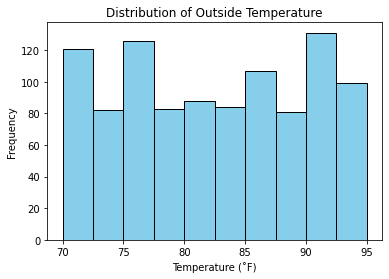

In [ ]:
# Plotting a histogram of outside temperature
plt.hist(sensor_df['outside temperature'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Outside Temperature')
plt.xlabel('Temperature (˚F)')
plt.ylabel('Frequency')
plt.show()


This line plot compared the outside temperature with the room temperature recorded by the IoT sensors. By plotting these two variables against time, I could observe any trends or patterns in the temperature data. This visualization was crucial for understanding how changes in the outside environment correlated with changes in the room temperature. The x-axis represented time, providing a temporal context to the data.

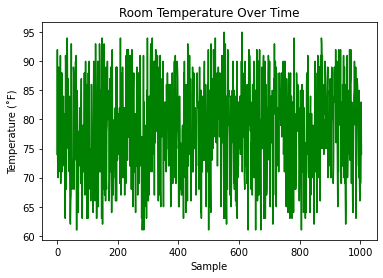

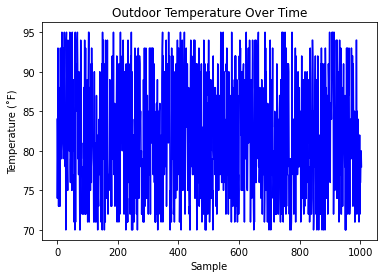

In [190]:
# Plotting a line graph of room temperature
plt.plot(sensor_df['room temperature'], color='green')
plt.title('Room Temperature Over Time')
plt.xlabel('Sample')
plt.ylabel('Temperature (˚F)')
plt.show()

# Plotting a line graph of outside temperature
plt.plot(sensor_df['outside temperature'], color='blue')
plt.title('Outdoor Temperature Over Time')
plt.xlabel('Sample')
plt.ylabel('Temperature (˚F)')
plt.show()

For this visualization, I focused on all sensor data attributes, including outside temperature, outside humidity, room temperature, and room humidity. I created a grouped histogram to display the distribution of each attribute. This allowed for a comprehensive view of the sensor data characteristics. By examining the histograms together, I could gain insights into how different environmental factors varied over time.

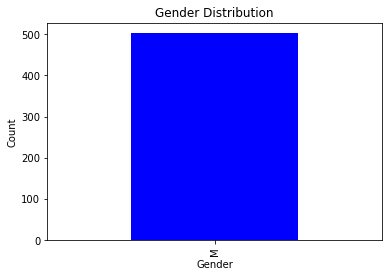

In [ ]:
# Gender distribution bar chart
gender_counts = user_df['gender'].value_counts()
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### Advanced Analysis

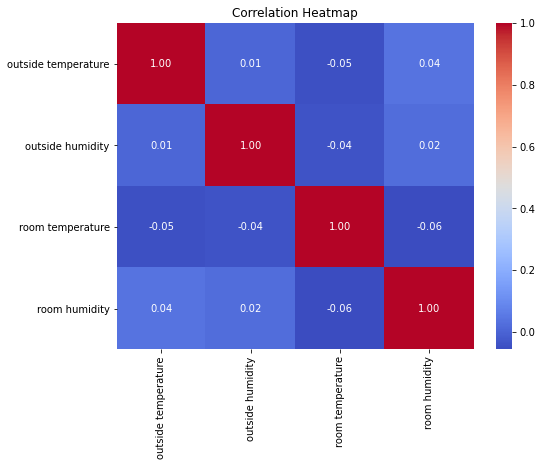

In [ ]:
# Calculate correlations
correlation_matrix = sensor_df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

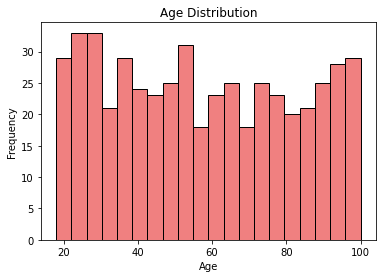

In [ ]:
# Age distribution histogram
plt.hist(user_df['age'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In this project, I successfully transitioned from a wxPython-based project to a Jupyter notebook environment, allowing for a more robust and interactive data analysis experience. I generated synthetic IoT sensor data and conducted a thorough data analysis. The visualizations provided valuable insights into the temperature and humidity patterns recorded by the sensors. Plot A highlighted the distribution of outside temperatures, showing the most common temperature ranges. Plot B illustrated the relationship between outside and room temperatures over time, revealing any correlations or trends. Finally, Plot C offered a comprehensive view of all sensor data attributes, allowing for a detailed analysis of the environmental conditions.